In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### We build the dataframe

We aggregate the different result tables

In [11]:
raw = pd.read_csv("Basis_init/result1.csv", sep=';')

for i in range (2,10):
    name = 'Basis_init/result'+str(i)+'.csv'
    raw = pd.concat([raw, pd.read_csv(name, sep=';')])

for i in range (1,5):
    name = 'Basis_init/result_double'+str(i)+'.csv'
    raw = pd.concat([raw, pd.read_csv(name, sep=';')])
    
for i in range (1,5):
    name = 'Basis_init/result_mem'+str(i)+'.csv'
    raw = pd.concat([raw, pd.read_csv(name, sep=';')])
    
for i in range (1,6):
    name = 'Random_init/result_init'+str(i)+'.csv'
    raw = pd.concat([raw, pd.read_csv(name, sep=';')])
    

raw = raw.sort_values('n').reset_index()

Some of the csv might include cases in which only GPU has been computed, we thus have to set the corresponding values for CPU to nan

In [12]:
def correct_df (x):
    if(x['time_CPU']==0):
        x['time_CPU']=np.nan
        x['loss_CPU']=np.nan
    if(x['time_GPU']==0):
        x['time_GPU']=np.nan
        x['loss_GPU']=np.nan
    if(x['time_CPU_double']==0):
        x['time_CPU_double']=np.nan
        x['loss_CPU_double']=np.nan
    if(x['time_GPU_mem']==0):
        x['time_GPU_mem']=np.nan
        x['loss_GPU_mem']=np.nan
    if(x['time_CPU_rand']==0):
        x['time_CPU_rand']=np.nan
        x['loss_CPU_rand']=np.nan
    return x

raw=raw.apply(correct_df, axis=1)
nb_measures = (raw['loss_CPU'].count()+raw['loss_CPU_double'].count()+raw['loss_GPU_mem'].count()
               +raw['loss_CPU_rand'].count()+raw['loss_GPU'].count())

In [13]:
raw.head()

,index,iter,loss_CPU,loss_CPU_double,loss_CPU_rand,loss_GPU,loss_GPU_mem,n,niter,time_CPU,time_CPU_double,time_CPU_rand,time_GPU,time_GPU_mem
0,0.0,0.0,0.000001,NaN,NaN,0.000001,NaN,1.0,3.0,0.000675,NaN,NaN,0.010475,NaN
1,2.0,2.0,0.000001,NaN,NaN,0.000001,NaN,1.0,3.0,0.000676,NaN,NaN,0.010497,NaN
2,1.0,1.0,0.000000,NaN,NaN,0.000000,NaN,1.0,3.0,0.000001,NaN,NaN,0.000293,NaN
3,3.0,0.0,0.000000,NaN,NaN,0.000011,NaN,2.0,3.0,0.000001,NaN,NaN,0.017662,NaN
4,4.0,1.0,0.000023,NaN,NaN,0.000013,NaN,2.0,3.0,0.000830,NaN,NaN,0.017594,NaN


We group by n, we have to do it separately, otherwise, due to the NaN, ther would be holes in the graph.

In [14]:
df=raw
timeGPU=df[['time_GPU','n']].copy().dropna().groupby('n')
timeCPU=df[['time_CPU','n']].copy().dropna().groupby('n')
timeCPUd=df[['time_CPU_double','n']].copy().dropna().groupby('n')
timeGPUm=df[['time_GPU_mem','n']].copy().dropna().groupby('n')
timeCPUr=df[['time_CPU_rand','n']].copy().dropna().groupby('n')

lossGPU=df[['loss_GPU','n']].copy().dropna().groupby('n')
lossCPU=df[['loss_CPU','n']].copy().dropna().groupby('n')
lossCPUd=df[['loss_CPU_double','n']].copy().dropna().groupby('n')
lossGPUm=df[['loss_GPU_mem','n']].copy().dropna().groupby('n')
lossCPUr=df[['loss_CPU_rand','n']].copy().dropna().groupby('n')

### Analysis of running time

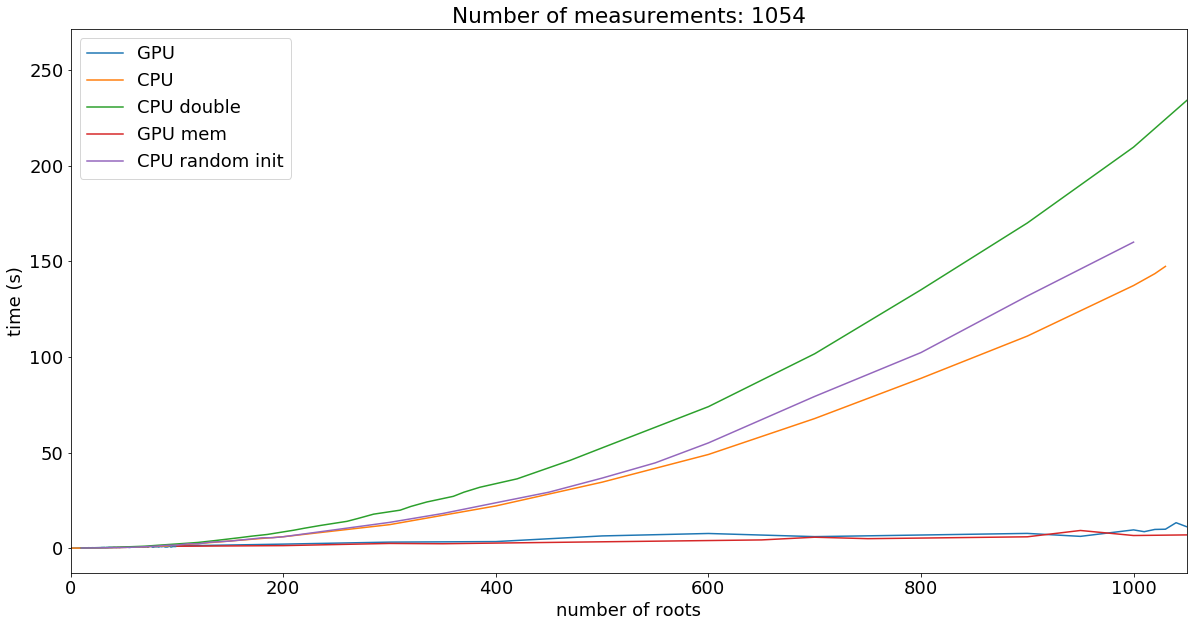

In [15]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 18})
plt.plot(timeGPU.mean().index,timeGPU['time_GPU'].mean(), label="GPU")
plt.plot(timeCPU.mean().index,timeCPU['time_CPU'].mean(), label="CPU")
plt.plot(timeCPUd.mean().index,timeCPUd['time_CPU_double'].mean(), label="CPU double")
plt.plot(timeGPUm.mean().index,timeGPUm['time_GPU_mem'].mean(), label="GPU mem")
plt.plot(timeCPUr.mean().index,timeCPUr['time_CPU_rand'].mean(), label="CPU random init")
plt.legend()
plt.xlim(0,1050)
plt.xlabel("number of roots")
plt.ylabel("time (s)")
plt.title('Number of measurements: '+str(nb_measures))

plt.show()

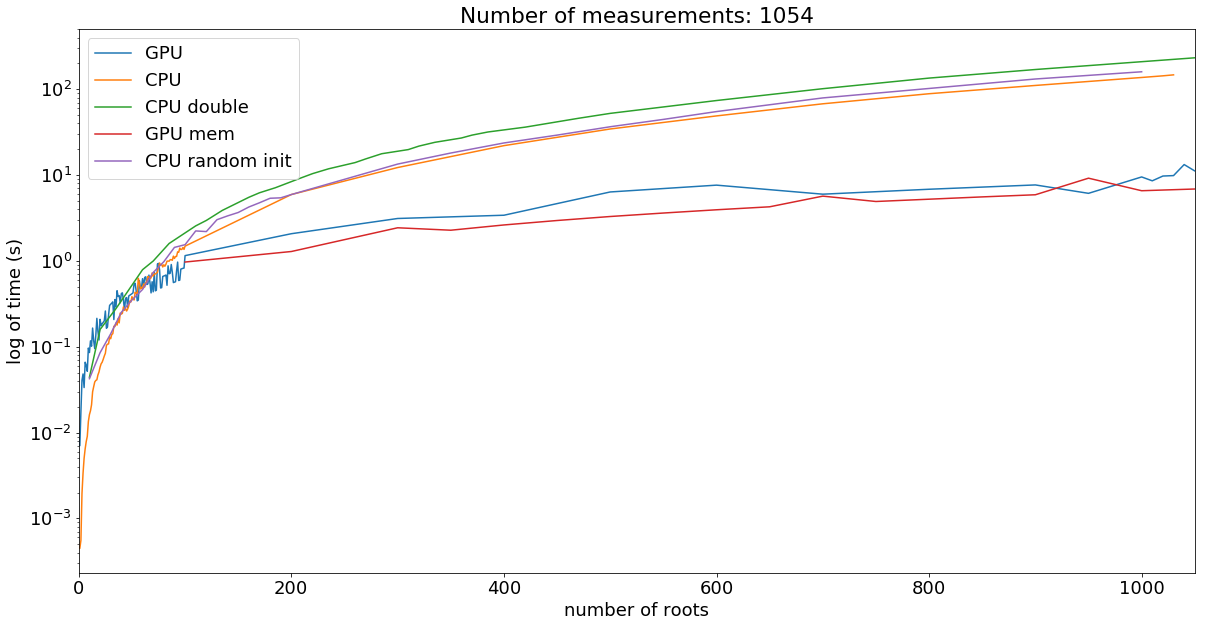

In [16]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 18})
plt.semilogy(timeGPU.mean().index,timeGPU['time_GPU'].mean(), label="GPU")
plt.semilogy(timeCPU.mean().index,timeCPU['time_CPU'].mean(), label="CPU")
plt.semilogy(timeCPUd.mean().index,timeCPUd['time_CPU_double'].mean(), label="CPU double")
plt.semilogy(timeGPUm.mean().index,timeGPUm['time_GPU_mem'].mean(), label="GPU mem")
plt.semilogy(timeCPUr.mean().index,timeCPUr['time_CPU_rand'].mean(), label="CPU random init")

plt.legend()
plt.xlim(0,1050)
plt.xlabel("number of roots")
plt.ylabel("log of time (s)")
plt.title('Number of measurements: '+str(nb_measures))

plt.show()

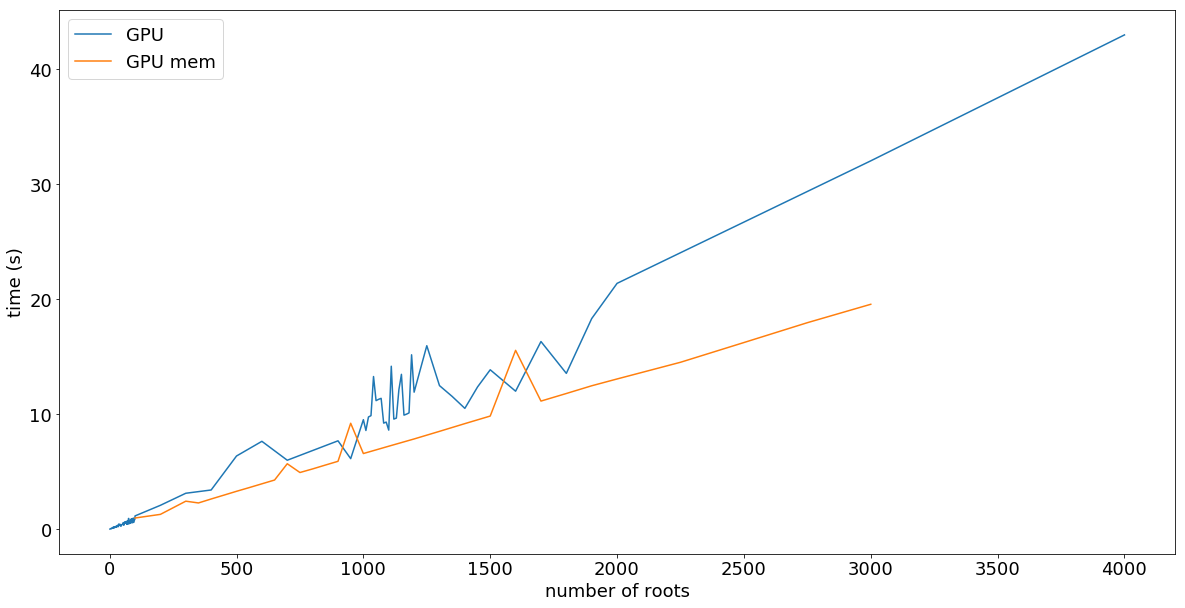

In [17]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 18})
plt.plot(timeGPU.mean().index,timeGPU['time_GPU'].mean(), label="GPU")
plt.plot(timeGPUm.mean().index,timeGPUm['time_GPU_mem'].mean(), label="GPU mem")
plt.legend()
plt.xlabel("number of roots")
plt.ylabel("time (s)")

plt.show()

#### Analysis of spectral loss

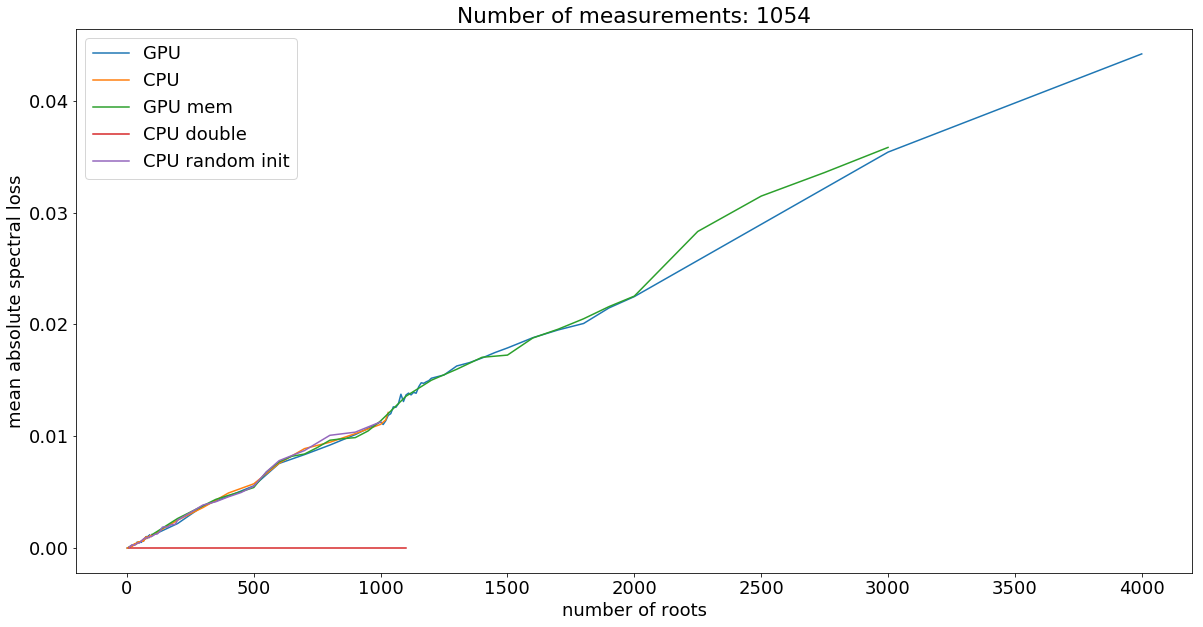

In [18]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 18})
plt.plot(lossGPU.mean().index,lossGPU['loss_GPU'].mean(), label="GPU")
plt.plot(lossCPU.mean().index,lossCPU['loss_CPU'].mean(), label="CPU")
plt.plot(lossGPUm.mean().index,lossGPUm['loss_GPU_mem'].mean(), label="GPU mem")
plt.plot(lossCPUd.mean().index,lossCPUd['loss_CPU_double'].mean(), label="CPU double")
plt.plot(lossCPUr.mean().index,lossCPUr['loss_CPU_rand'].mean(), label="CPU random init")
plt.legend()
plt.xlabel("number of roots")
plt.ylabel("mean absolute spectral loss")
plt.title('Number of measurements: '+str(nb_measures))

plt.show()